In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

web_df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/web_events.csv')

In [ ]:
web_df.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [ ]:
web_df['timestamp'] = pd.to_datetime(web_df['timestamp'], unit='ms')
web_df.head()

In [ ]:
web_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      datetime64[ns]
 1   visitorid      int64         
 2   event          object        
 3   itemid         int64         
 4   transactionid  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 105.1+ MB


In [ ]:
web_df['Date'] = web_df['timestamp'].dt.date
web_df['Month'] = web_df['timestamp'].dt.strftime('%B')
web_df['Day'] = web_df['timestamp'].dt.day
web_df['Hour'] = web_df['timestamp'].dt.hour
web_df['Minute'] = web_df['timestamp'].dt.minute
web_df['Weekday'] = web_df['timestamp'].dt.weekday

In [ ]:
web_df.head()

,timestamp,visitorid,event,itemid,transactionid,Date,Month,Day,Hour,Minute,Weekday
0,2015-06-02 05:02:12.117,257597,view,355908,NaN,2015-06-02,June,2,5,2,1
1,2015-06-02 05:50:14.164,992329,view,248676,NaN,2015-06-02,June,2,5,50,1
2,2015-06-02 05:13:19.827,111016,view,318965,NaN,2015-06-02,June,2,5,13,1
3,2015-06-02 05:12:35.914,483717,view,253185,NaN,2015-06-02,June,2,5,12,1
4,2015-06-02 05:02:17.106,951259,view,367447,NaN,2015-06-02,June,2,5,2,1


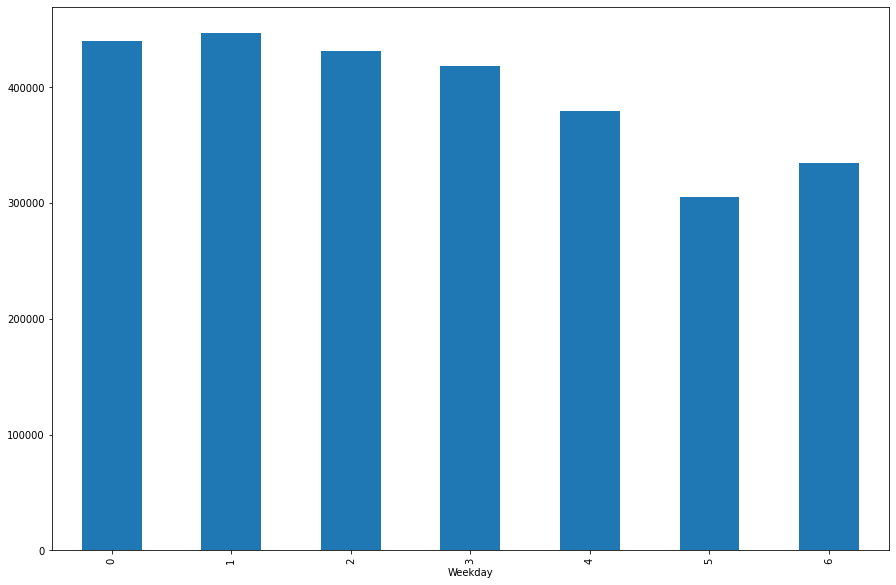

In [ ]:
web_df.groupby('Weekday').count()['event'].plot(kind='bar', figsize=(15,10))

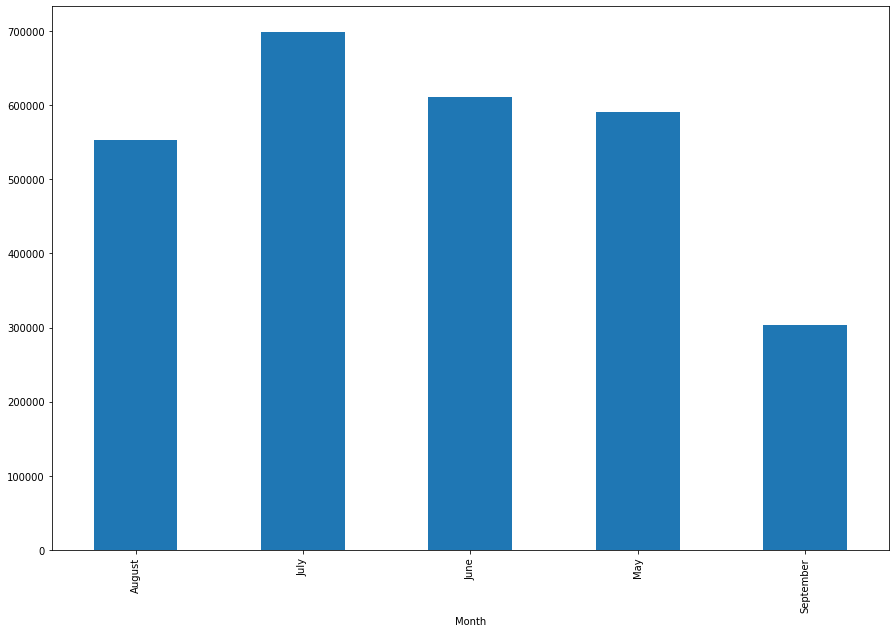

In [ ]:
web_df.groupby('Month').count()['event'].plot(kind='bar', figsize=(15,10))

In [ ]:
agg_df = web_df.groupby('Month', as_index=False).count() #.reset_index()
agg_df.head()


,Month,timestamp,visitorid,event,itemid,transactionid,Date,Day,Hour,Minute,Weekday
0,August,553362,553362,553362,553362,4632,553362,553362,553362,553362,553362
1,July,697984,697984,697984,697984,5802,697984,697984,697984,697984,697984
2,June,610393,610393,610393,610393,5043,610393,610393,610393,610393,610393
3,May,590652,590652,590652,590652,4611,590652,590652,590652,590652,590652
4,September,303710,303710,303710,303710,2369,303710,303710,303710,303710,303710


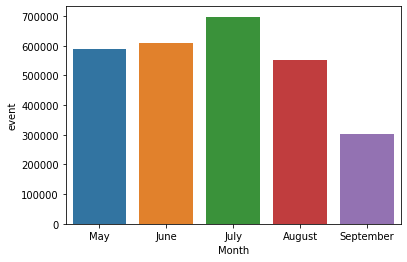

In [ ]:
sns.barplot(data=agg_df, x='Month', y='event', order=['May', 'June', 'July', 'August', 'September'])

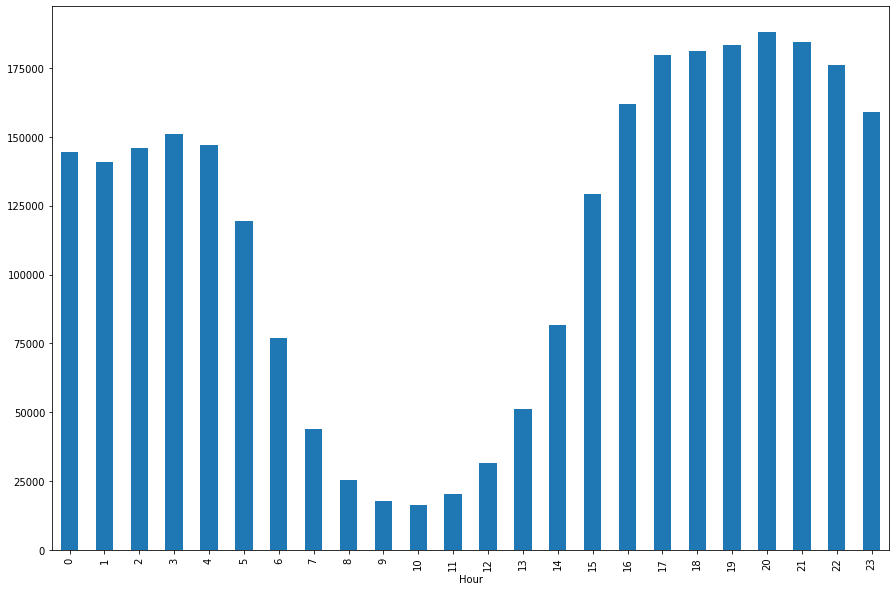

In [ ]:
web_df.groupby('Hour').count()['event'].plot(kind='bar', figsize=(15,10))

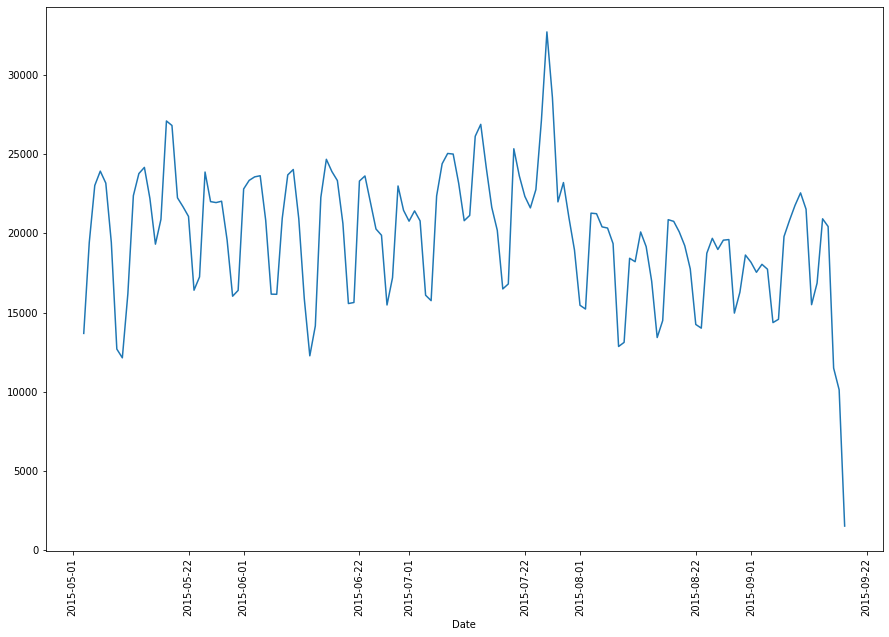

In [ ]:
web_df.groupby('Date').count()['event'].plot(kind='line', figsize=(15,10), rot=90)

In [ ]:
web_df.head()

,timestamp,visitorid,event,itemid,transactionid,Date,Month,Day,Hour,Minute,Weekday
0,2015-06-02 05:02:12.117,257597,view,355908,NaN,2015-06-02,June,2,5,2,1
1,2015-06-02 05:50:14.164,992329,view,248676,NaN,2015-06-02,June,2,5,50,1
2,2015-06-02 05:13:19.827,111016,view,318965,NaN,2015-06-02,June,2,5,13,1
3,2015-06-02 05:12:35.914,483717,view,253185,NaN,2015-06-02,June,2,5,12,1
4,2015-06-02 05:02:17.106,951259,view,367447,NaN,2015-06-02,June,2,5,2,1


In [ ]:
web_events_month = web_df.pivot_table(index='Hour', columns='Month', values='event', aggfunc='count')

In [ ]:
web_events_month

Month,August,July,June,May,September
Hour,,,,,
0,28553,36664,31584,31464,16038
1,27737,34877,31164,30870,16054
2,28733,36227,32333,32117,16469
3,30214,37146,33094,33134,17272
4,28613,37609,33368,31544,16050
5,23278,31521,26821,25983,11969
6,14982,20054,17869,16562,7505
7,9023,11939,9570,9081,4331
8,5175,7273,5367,5033,2461


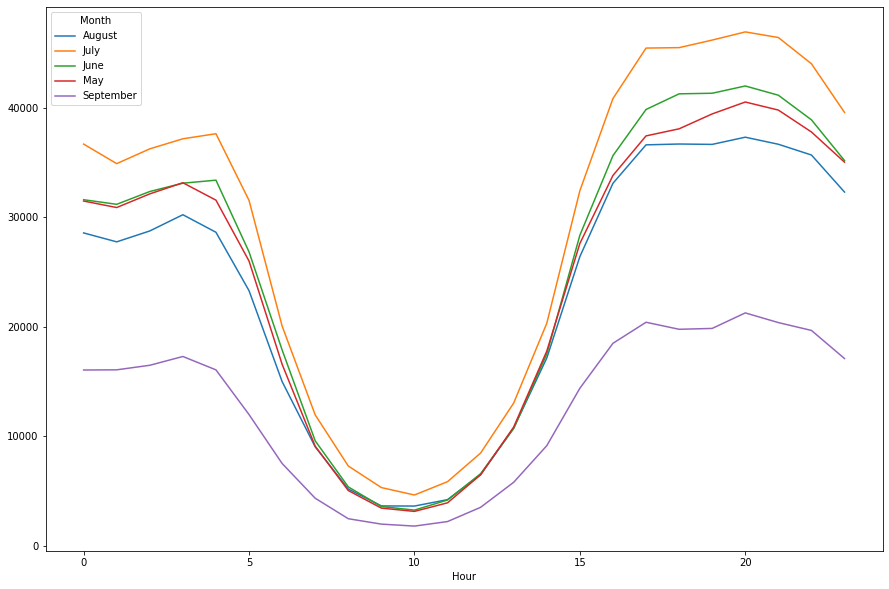

In [ ]:
web_events_month.plot(kind='line', figsize=(15,10))

In [ ]:
heatmap_df = web_df.pivot_table(index='Hour', columns='Weekday', values='event', aggfunc='count')

In [ ]:
heatmap_df

Weekday,0,1,2,3,4,5,6
Hour,,,,,,,
0,21768,23304,22057,21908,21078,17130,17058
1,21960,23013,21468,21102,19615,16824,16720
2,22615,24124,22463,21941,20430,17280,17026
3,23046,24613,23196,22866,20729,17818,18592
4,22472,23895,22850,22605,19632,17508,18222
5,17604,18696,18231,17995,16050,14903,16093
6,11889,11551,10564,11269,10597,9909,11193
7,6476,6253,5873,6243,6114,6136,6849
8,3532,3673,3555,3414,3305,3550,4280


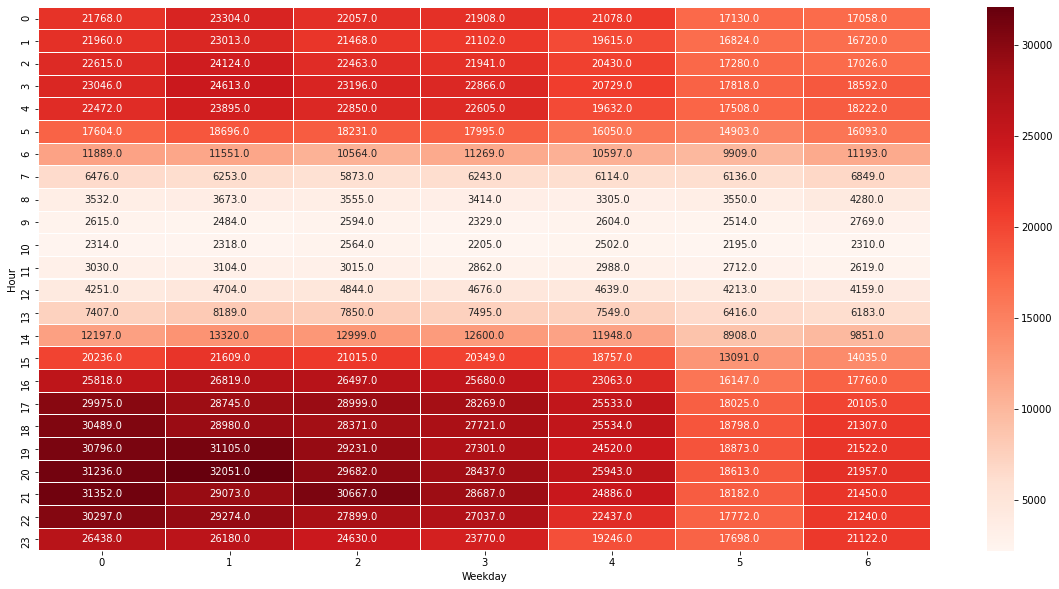

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data=heatmap_df, annot=True, fmt='.1f', cmap='Reds', linewidths=0.01)

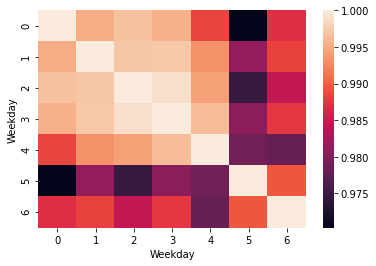

In [ ]:
corr = heatmap_df.corr()
sns.heatmap(corr)

In [ ]:
scatter_df = web_df.pivot_table(index='Date', columns='event', values='visitorid', aggfunc='count')

In [ ]:
def scatterplot(df, x, y, length=8, width=14, title=''):
  grid=sns.lmplot(data=df, x=x, y=y)
  grid.fig.set_figwidth(width)
  grid.fig.set_figheight(length)
  plt.title(title + "\n", fontsize=18)

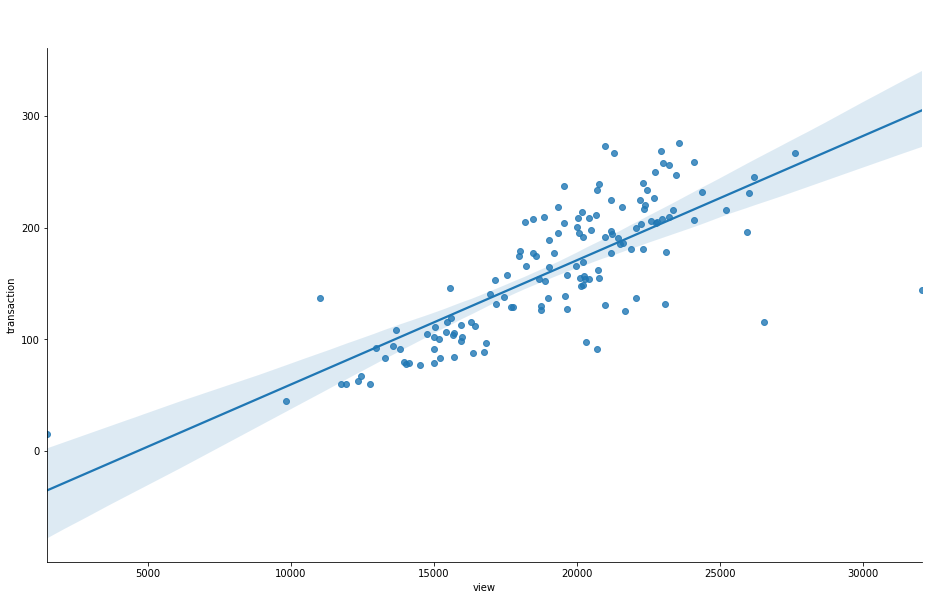

In [ ]:
scatterplot(scatter_df,'view', 'transaction')